In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
W0 = 0
X = np.array([0, 1, 2, 3, 3, 4, 5, 5, 6, 9, 9])
y = np.array([0, 1.2, 3, 2, 3.5, 4.6, 5.4, 8, 3, 10, 8])

In [65]:
X, y

(array([0, 1, 2, 3, 3, 4, 5, 5, 6, 9, 9]),
 array([ 0. ,  1.2,  3. ,  2. ,  3.5,  4.6,  5.4,  8. ,  3. , 10. ,  8. ]))

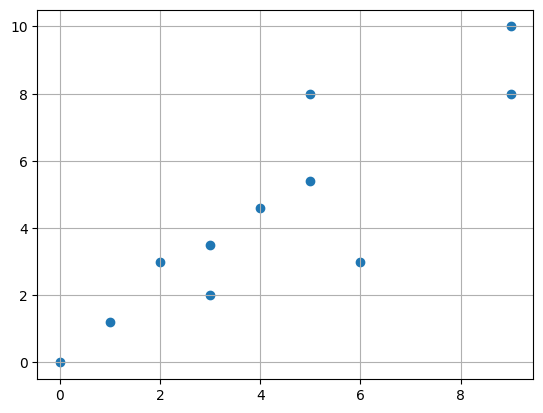

In [66]:
plt.scatter(X, y)
plt.grid()

In [67]:
def model(w1, x):
    return W0 + w1 * x

In [68]:
# J = 1/m * sum(h(xi) - yi) ** 2

def cost(w1, X, y):
    res = 0
    for xi, yi in zip(X, y):
        hi = model(w1, xi)
        diff = (hi - yi)
        res += diff ** 2

    return res / len(y)

cost(1, X, y)

2.0736363636363637

0.0 28.546363636363637
0.2222222222222222 18.15399551066218
0.4444444444444444 10.338507295173962
0.6666666666666666 5.09989898989899
0.8888888888888888 2.438170594837261
1.1111111111111112 2.353322109988777
1.3333333333333333 4.845353535353535
1.5555555555555554 9.914264870931532
1.7777777777777777 17.560056116722784
2.0 27.782727272727275


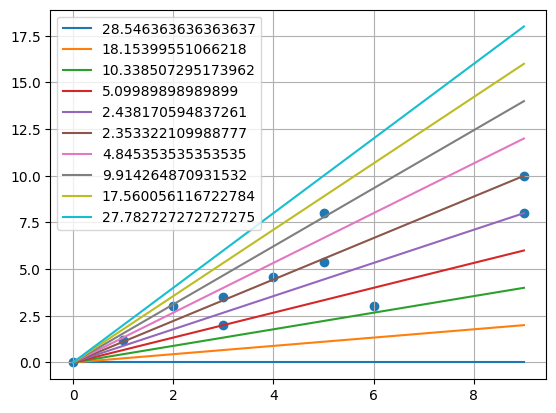

In [70]:
plt.scatter(X, y)
res = []
for w1 in np.linspace(0, 2, 10):
    tmp = cost(w1, X, y)
    print(w1, tmp)
    res.append(tmp)
    plt.plot(X, model(w1, np.array(X)), label=tmp)

plt.legend()
plt.grid()

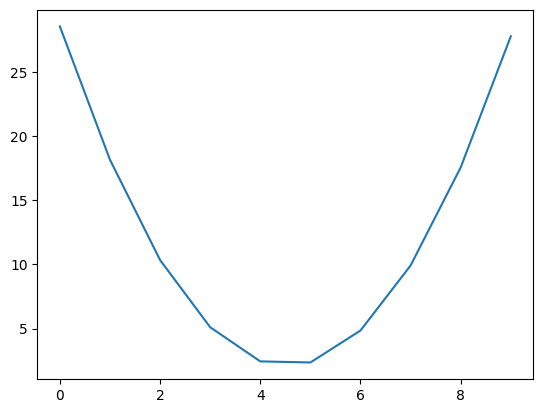

In [71]:
plt.plot(res)

In [72]:
# w1 = prev_w1 - L * 1 / m * sum((h(xi) - yi) * xi)

def update_weights(w1, X, y, L):
    prev_w1 = w1
    m = len(y)
    h = model(w1, X)
    w1 = prev_w1 - L * np.sum((h - y) * X) / m

    return w1

In [82]:
w1 = 0
thr = 0.001

last_cost = 10000

for i in range(100):
    w1 = update_weights(w1=w1, X=X, y=y, L=0.01)
    new_cost = cost(w1, X, y)
    print(i, w1, new_cost)
    if last_cost - new_cost < thr:
        break
    last_cost = new_cost

0 0.26281818181818184 16.53387201126972
1 0.4570647107438017 9.97198393114848
2 0.6006305543951916 6.3875173175702535
3 0.7067387642939007 4.429483174503985
4 0.7851623776099466 3.3598965054888037
5 0.8431245572698969 2.775629041825748
6 0.8859638773276601 2.456469801172935
7 0.9176260293339888 2.282127351474546
8 0.9410272380441209 2.186891851776451
9 0.9583228586635184 2.1348689484707086
10 0.9711058946304004 2.1064511580780683
11 0.980553720304105 2.090927787418538
12 0.9875365223702158 2.0824480628057604
13 0.9926974478972596 2.0778159676837915
14 0.9965118410367927 2.0752856608402612
15 0.9993310243299204 2.0739034671344245
16 1.001414657072932 2.073148436397604
